# Features Exploration

## Import Libraries

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd

## (MFCCs + Deltas -> Normalize -> Pad) Features Exploration

### Load Metadata

In [102]:
metadata = pd.read_csv("../data/features/audio_16k/augmented_mfcc+deltas_mel-spectrograms_spectral_prosodic/metadata.csv")

### Pick a feature to visualize

In [105]:
feature = metadata[
    (metadata["emotion"].str.lower() == "angry") & 
    (metadata["augmentation"].str.lower() == "original")
].iloc[700]
emotion_feature = np.load(feature.file_path)
print(f"shape: {metadata.shape}")

shape: (56590, 8)


### Visualize

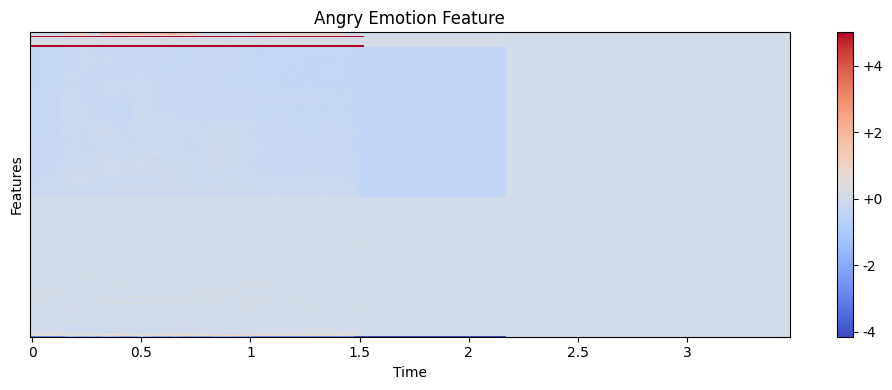

In [106]:
# Remove extra dimensions if needed
# If shape is (1, 120, 150), squeeze out the first dimension
if emotion_feature.ndim == 3:
    emotion_feature = emotion_feature.squeeze()
    # Or specifically: emotion_feature = emotion_feature[0]

# If it's (120, 150), transpose to (150, 120) so features are on y-axis
if emotion_feature.shape[0] < emotion_feature.shape[1]:
    emotion_feature = emotion_feature.T

plt.figure(figsize=(10, 4))
librosa.display.specshow(emotion_feature, x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('Angry Emotion Feature')
plt.ylabel('Features')
plt.tight_layout()
plt.show()